# 📘 **Régression Linéaire Simple – Analyse et Application avec Python** 📊


## 🎯 Objectif du cours

Comprendre la régression linéaire simple d’un point de vue **statistique** et **mathématique**, en illustrant avec un jeu de données réel.

## 1. 📌 Introduction

La régression linéaire permet de modéliser une **relation linéaire** entre une variable dépendante $Y$ et une variable explicative $X$.

**Exemple** : On souhaite prédire le pourboire $Y = \text{tip}$ en fonction de l’addition $X = \text{total\_bill}$.

---

### 📊 Jeu de données simulé

Nous allons utiliser un jeu de données simple inspiré du dataset `tips`. Voici un extrait :


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

data = {
    'total_bill': [10.34, 21.01, 23.68, 24.59, 25.29, 27.18, 29.93, 31.27, 34.81, 38.01],
    'tip':        [1.66, 3.00, 3.31, 3.61, 4.71, 3.50, 5.07, 5.00, 5.20, 6.00]
}
df = pd.DataFrame(data)
df.head()

,total_bill,tip
0,10.34,1.66
1,21.01,3.00
2,23.68,3.31
3,24.59,3.61
4,25.29,4.71


Nous avons maintenant un tableau avec l'addition totale et le pourboire, ce qui nous permettra de modéliser la relation linéaire entre les deux variables.



## 📐 Le modèle linéaire simple

On suppose que la relation entre $ Y $ et $ X $ est donnée par :

$$
Y_i = \alpha + \beta X_i + \varepsilon_i
$$

où :

- $ Y_i $ : variable à prédire,
- $ X_i $ : variable explicative,
- $ \alpha $ : intercept (valeur de $ Y $ lorsque $ X = 0 $),
- $ \beta $ : pente (variation de $ Y $ lorsque $ X $ augmente de 1 unité),
- $ \varepsilon_i $ : erreur aléatoire supposée centrée et de variance constante.


## Visualisation du nuage de points

Pour commencer, visualisons les données avec un nuage de points. Chaque point représente une observation dans notre jeu de données, où l'axe des abscisses est l'addition totale et l'axe des ordonnées est le pourboire :


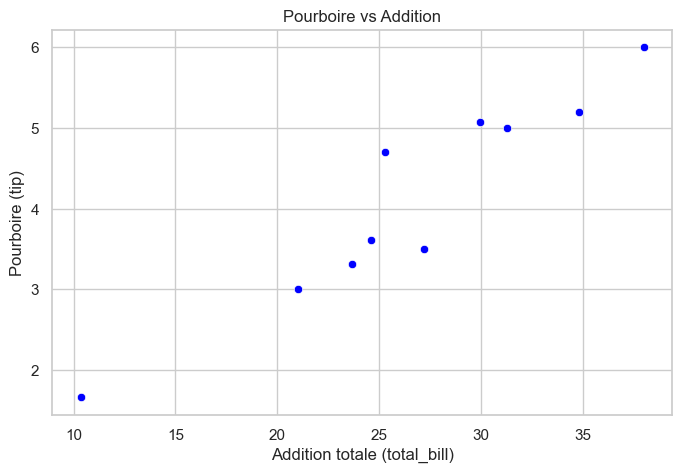

In [30]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="total_bill", y="tip", color="blue")
plt.title("Pourboire vs Addition")
plt.xlabel("Addition totale (total_bill)")
plt.ylabel("Pourboire (tip)")
plt.show()

Le nuage de points montre une tendance générale où le pourboire augmente lorsque l'addition augmente. Cela suggère une relation linéaire.

## 🧮 Estimation des paramètres par moindres carrés

On cherche à minimiser la somme des carrés des erreurs :

$$
S(\alpha, \beta) = \sum_{i=1}^{n} (Y_i - \alpha - \beta X_i)^2
$$

Les estimateurs des paramètres sont donnés par :

$$
\hat{\beta} = \frac{\sum (X_i - \bar{X})(Y_i - \bar{Y})}{\sum (X_i - \bar{X})^2}
$$

et

$$
\hat{\alpha} = \bar{Y} - \hat{\beta} \bar{X}
$$

Ces estimateurs sont :

- Non biaisés,
- Efficient (minimum de variance parmi les estimateurs linéaires).


## Régression linéaire avec statsmodels

Utilisons maintenant la méthode des moindres carrés pour estimer les coefficients $\alpha$ et $\beta$. Nous allons aussi afficher les résultats statistiques du modèle, y compris l'intercept et la pente :


In [31]:
import statsmodels.api as sm

X = sm.add_constant(df["total_bill"])  # Ajout d'une constante (intercept)
y = df["tip"]

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     67.81
Date:                Sat, 12 Apr 2025   Prob (F-statistic):           3.54e-05
Time:                        21:15:10   Log-Likelihood:                -5.0819
No. Observations:                  10   AIC:                             14.16
Df Residuals:                       8   BIC:                             14.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1317      0.534     -0.247      0.8

C:\Users\USER\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Les résultats affichent :

- L'estimation de $\beta$, qui est la pente,
- L'estimation de $\alpha$, qui est l'intercept,
- Des informations statistiques comme le coefficient de détermination $R^2$.


## 🔍 Qualité de l’ajustement

On mesure la qualité du modèle avec le coefficient de détermination $R^2$ :

$$
R^2 = 1 - \frac{\text{SSE}}{\text{SST}} = \frac{\text{SSR}}{\text{SST}}
$$

où :

- SST : somme totale des carrés $\sum (Y_i - \bar{Y})^2$
- SSE : somme des carrés des erreurs (résidus) $\sum (Y_i - \hat{Y}_i)^2$
- SSR : somme des carrés expliquée par la régression

$R^2 \in [0, 1]$ : plus il est proche de 1, plus la régression est bonne.


## Visualisation de la droite de régression

En complément, visualisons la droite de régression, qui montre la relation linéaire modélisée entre l'addition et le pourboire :


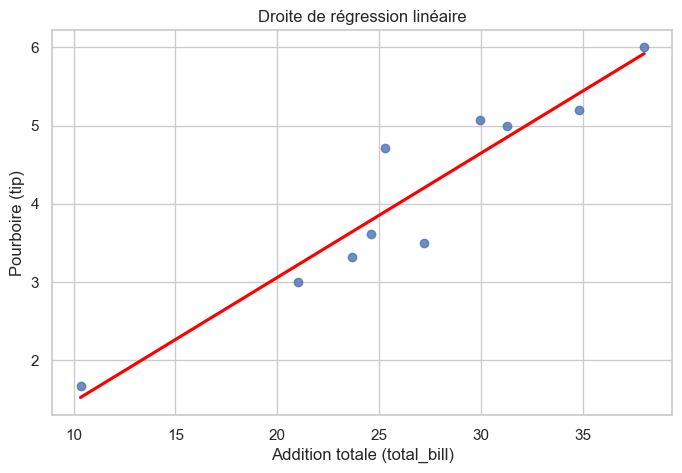

In [32]:
plt.figure(figsize=(8, 5))
sns.regplot(data=df, x="total_bill", y="tip", ci=None, line_kws={"color": "red"})
plt.title("Droite de régression linéaire")
plt.xlabel("Addition totale (total_bill)")
plt.ylabel("Pourboire (tip)")
plt.show()

## 5. 🧪 Inférence statistique

### a) Test de Student sur $\beta$

On teste :

$$
H_0 : \beta = 0 \quad \text{vs} \quad H_1 : \beta \ne 0
$$

**Statistique de test :**

$$
t = \frac{\hat{\beta}}{\text{erreur standard}(\hat{\beta})}
$$

Elle suit une loi de Student à $n - 2$ degrés de liberté sous $H_0$.


Dans statsmodels, le test de Student est automatiquement effectué et affiché dans le .summary(). Voici comment extraire manuellement les éléments :

In [33]:
# Statistique de test t et p-value pour beta
t_beta = model.tvalues['total_bill']
p_beta = model.pvalues['total_bill']
print(f"t = {t_beta:.3f}")
print(f"p-value = {p_beta:.3f}")


t = 8.235
p-value = 0.000


Ce test vérifie si le coefficient $\beta$ est significativement différent de 0. Une p-valeur faible (inférieure à 5%) indique que $\beta$ est significatif.



### b) Intervalle de confiance

Un intervalle de confiance à $95\%$ pour $\beta$ :

$$
\hat{\beta} \pm t_{1 - \alpha/2} \cdot \text{SE}(\hat{\beta})
$$

In [34]:
# Intervalle de confiance à 95 % pour beta
conf = model.conf_int(alpha=0.05)  # alpha=0.05 pour 95%
beta_ci = conf.loc['total_bill']
print(f"Intervalle de confiance pour beta : [{beta_ci[0]:.3f}, {beta_ci[1]:.3f}]")


Intervalle de confiance pour beta : [0.115, 0.204]


## 6. 📈 Analyse des résidus

Les hypothèses classiques du modèle linéaire sont :

- Linéarité de la relation $X \rightarrow Y$,
- Indépendance des erreurs $\varepsilon_i$,
- Homoscédasticité (variance constante des erreurs),
- Normalité des résidus.

Les résidus sont définis par :

$$
e_i = Y_i - \hat{Y}_i
$$

Un bon modèle doit produire des résidus sans structure apparente.


## 📊 Prédictions et Résidus

Calculons maintenant les résidus du modèle en comparant les valeurs prédites avec les valeurs observées :


In [35]:
df["tip_pred"] = model.predict(X)
df["residuals"] = df["tip"] - df["tip_pred"]
df.head()

,total_bill,tip,tip_pred,residuals
0,10.34,1.66,1.514932,0.145068
1,21.01,3.00,3.214071,-0.214071
2,23.68,3.31,3.639254,-0.329254
3,24.59,3.61,3.784167,-0.174167
4,25.29,4.71,3.895638,0.814362


## 🔍 Analyse des Résidus

Affichons un graphique des résidus pour vérifier l'hypothèse d'homoscédasticité (variance constante des erreurs).  
Si les résidus sont répartis de manière aléatoire autour de zéro, cela suggère que le modèle est bien adapté.


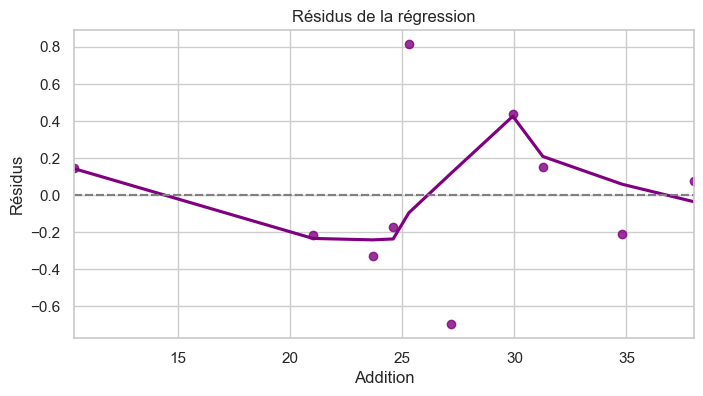

In [36]:
plt.figure(figsize=(8, 4))
sns.residplot(x="total_bill", y="tip", data=df, lowess=True, color="purple")
plt.axhline(0, color='gray', linestyle='--')
plt.title("Résidus de la régression")
plt.xlabel("Addition")
plt.ylabel("Résidus")
plt.show()


## 3. 📐 Estimation des paramètres par moindres carrés avec `scikit-learn`

Dans cette section, nous allons estimer les paramètres du modèle de régression linéaire ($\alpha$ et $\beta$) en utilisant la méthode des moindres carrés, via le module **`LinearRegression`** de **scikit-learn**.

### 📊 Le modèle

Le modèle de régression linéaire simple est défini par l'équation suivante :

$$
Y_i = \alpha + \beta X_i + \varepsilon_i
$$

- $Y_i$ : variable à prédire (le pourboire dans notre exemple),
- $X_i$ : variable explicative (le montant total de l'addition),
- $\alpha$ : l'intercept ou ordonnée à l'origine,
- $\beta$ : la pente de la droite de régression,
- $\varepsilon_i$ : l'erreur aléatoire.

### 🔧 Étapes de calcul

#### 1. Séparation des variables

Tout d'abord, nous devons séparer la variable explicative ($X$) et la variable à prédire ($Y$). Pour ce faire, nous extrayons les colonnes appropriées de notre dataframe :



In [37]:

# Séparation des variables X et y
X = df[['total_bill']]  # Les variables explicatives (doivent être sous forme de DataFrame)
y = df['tip']  # La variable à prédire (série pandas)


## 2. Création et ajustement du modèle

Ensuite, nous créons une instance du modèle `LinearRegression` et ajustons ce modèle aux données en utilisant la méthode `fit()` :


In [38]:
from sklearn.linear_model import LinearRegression

# Création du modèle
model = LinearRegression()

# Ajustement du modèle aux données
model.fit(X, y)

LinearRegression()

## 3. Estimation des paramètres
Après avoir ajusté le modèle, nous pouvons obtenir l'intercept ($\alpha$) et la pente ($\beta$) du modèle :

In [39]:
# Affichage des résultats
alpha = model.intercept_  # Intercept (α)
beta = model.coef_[0]  # Pente (β)

print(f"Intercept (α) = {alpha:.3f}")
print(f"Pente (β) = {beta:.3f}")


Intercept (α) = -0.132
Pente (β) = 0.159


- $\alpha$ (intercept) représente la valeur de $Y$ (le pourboire) lorsque $X$ (l'addition) est égal à 0.

- $\beta$ (pente) représente la variation de $Y$ pour chaque unité d'augmentation de $X$.

## 4. Visualisation de la droite de régression
Nous pouvons visualiser la droite de régression obtenue à partir du modèle, en traçant à la fois les points de données et la droite ajustée :

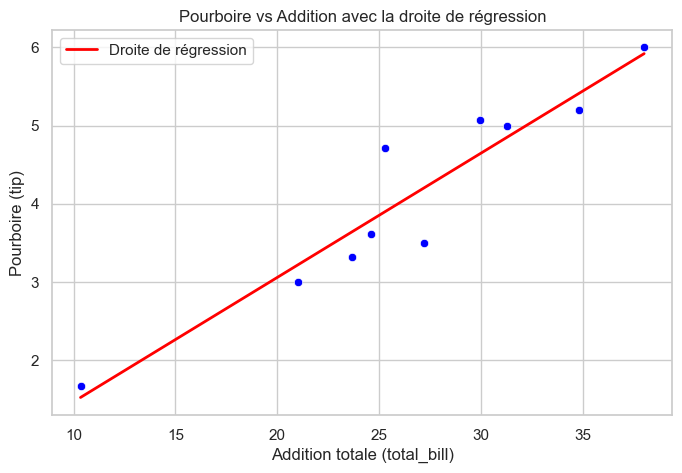

In [40]:
# Prédictions du modèle
y_pred = model.predict(X)

# Tracé du nuage de points avec la droite de régression
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="total_bill", y="tip", color="blue")
plt.plot(df['total_bill'], y_pred, color='red', lw=2, label="Droite de régression")
plt.title("Pourboire vs Addition avec la droite de régression")
plt.xlabel("Addition totale (total_bill)")
plt.ylabel("Pourboire (tip)")
plt.legend()
plt.show()


## 5. 🔀 Séparation des données : Entraînement et test

Pour évaluer **objectivement** la performance d’un modèle de régression, on ne doit pas le tester sur les données qui ont servi à l’entraîner.

👉 On divise donc le jeu de données en deux parties :
- **Entraînement** (`X_train`, `y_train`) : pour ajuster le modèle.
- **Test** (`X_test`, `y_test`) : pour estimer la performance sur des données nouvelles.

### 🛠️ Utilisation de `train_test_split`




In [41]:
from sklearn.model_selection import train_test_split

# Séparation des données (80% entraînement, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
# Création et entraînement du modèle sur les données d'entraînement
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [43]:
# Prédiction sur le jeu de test
y_pred_test = model.predict(X_test)

# R² sur le jeu de test
r2_test = model.score(X_test, y_test)
print(f"R² sur les données de test : {r2_test:.3f}")


R² sur les données de test : 0.940


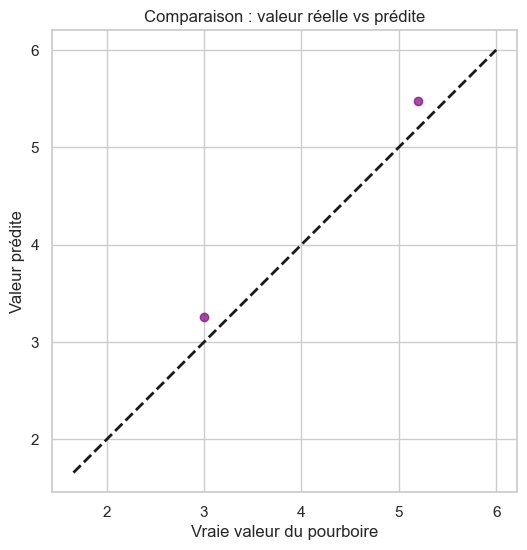

In [44]:
# Comparaison visuelle : prédictions vs vraies valeurs
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_test, color='purple', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel("Vraie valeur du pourboire")
plt.ylabel("Valeur prédite")
plt.title("Comparaison : valeur réelle vs prédite")
plt.axis("equal")
plt.show()


In [45]:
model.coef_

array([0.160773])